In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from colorama import Fore as f, Back as b, Style as s

In [132]:
sHero = pd.read_csv("superhero_data.csv")#input csv

df = pd.DataFrame(sHero) #set as our data frame

nRows = df.shape[0]
nCols = df.shape[1]


#print(df.head(0)) #print out the header to make sure we can read the data

def pBreak():
    print("=====================================================================================")


'''
Parse and clean data for graph 1 
Who makes more heros?
'''
utypes = ['Marvel', 'DC'] #lables for pi chart
uCount = df["UNIVERSE"].value_counts().tolist() #count number of heros in each universe and convert it to a list 


'''
Parse and clean data for graph 2 
Of all the heroes in the data set how many are good or bad?
'''
hAlignR = df["ALIGN"].value_counts().tolist()
# ^ count the occurences of each value in the column align convert to list
#index of list goes bad, good, other (ND etc)
otherAlign = hAlignR[2] + hAlignR[3] + hAlignR[4] 
# ^ sum all the categories that aren't good or bad into another var
gbLabels = ['Bad', 'Good', 'Other'] #List of pichart labels
alignF = [hAlignR[0], hAlignR[1], otherAlign] #List that only cotains good bad and other charcters

'''
Parse and clean data for graph 3.
How many charctes ar homosexual?
'''

#Using lists and valueCounts:
hVhe = df["SEXUALITY"].value_counts().tolist()
#Hetro, homo, other
otherSP = hVhe[2]+hVhe[3]+hVhe[4]+hVhe[5]+hVhe[6]+hVhe[7]
hLabels = ["Hetro","Homo","Other"]
hVFinal = [hVhe[0], hVhe[1], otherSP]
print(hVhe)


#Using Cross Tab:
homoVHetro = pd.crosstab(index = df["UNIVERSE"], columns = df["SEXUALITY"] == "Homosexual Characters", normalize = 'index')
homoVHetro.columns = ["Straight","Homosexual"]
homoVHetro.index = ["DC", "Marvel"]



'''
Parse and clean data for graph 4.
What supers have the highest frequency of occurence?
'''

#attempting to sort values by apperences and name but that didn't work lol
df.sort_values(by=['name','APPEARANCES'], ascending = True, inplace =False, na_position = 'first')

highOc = df["name"] + " appeared " + df["APPEARANCES"] + " times"

#print(highOc[0:21])





[23118, 150, 118, 29, 2, 1, 1, 1]


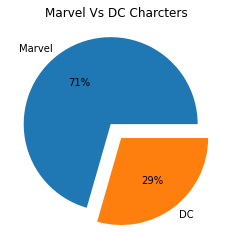

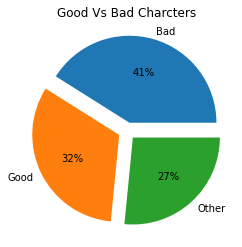

        Straight  Homosexual
DC      0.992169    0.007831
Marvel  0.996127    0.003873

Since this is a bit unclear based on the raw cross tab & graphs below.
We can see that:
99.2% of DC charcters are straight and 7.8% are homosexual.
99.6% of Marvel charcters are straight and 3.8% are homosexual.
Which still totals to 1% of all the charcters in the set being homosexual


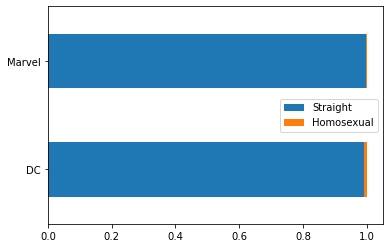

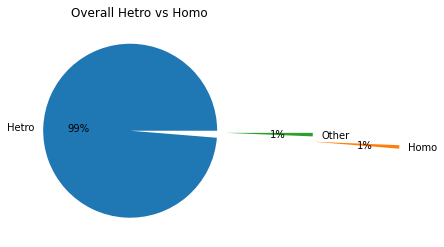

In [133]:
#Plot Marvel Vs DC
plt.figure()
plt.title("Marvel Vs DC Charcters")
plt.pie(uCount, labels=utypes, explode=(0.1,0.1), autopct='%1.0f%%')
#^ args data, labels, spacing, precentage punctuation
plt.show()#show plot

pBreak()

#Plot Good Vs Bad
plt.figure()
plt.title("Good Vs Bad Charcters")
plt.pie(alignF, labels=gbLabels, explode=(0.1,0.1, 0.1), autopct='%1.0f%%')
plt.show()#show plot

pBreak()





#Plot Striaght vs Gay
print(homoVHetro)


fig3=homoVHetro.plot.barh(stacked = True) #graphing with cross tab
print("\nSince this is a bit unclear based on the raw cross tab & graphs below.\nWe can see that:") 
print(f.GREEN+"99.2% of DC charcters are straight and 7.8% are homosexual.")
print("99.6% of Marvel charcters are straight and 3.8% are homosexual.\nWhich still totals to 1% of all the charcters in the set being homosexual"+s.RESET_ALL)

plt.figure()
plt.title("Overall Hetro vs Homo")
plt.pie(hVFinal, labels=hLabels, explode=(0.1,2, 1), autopct='%1.0f%%')#plot pi
plt.show()#show plot




pBreak()

